In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


# Data Cleaning

In [48]:
train.columns = ['_'.join(col.split(' ')).lower() for col in train.columns]
test.columns = ['_'.join(col.split(' ')).lower() for col in test.columns]

In [49]:
print(train.columns)
print(test.columns)

Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score', 'credit_default'],
      dtype='object')
Index(['id', 'home_ownership', 'annual_income', 'years_in_current_job',
       'tax_liens', 'number_of_open_accounts', 'years_of_credit_history',
       'maximum_open_credit', 'number_of_credit_problems',
       'months_since_last_delinquent', 'bankruptcies', 'purpose', 'term',
       'current_loan_amount', 'current_credit_balance', 'monthly_debt',
       'credit_score'],
      dtype='object')


### Getting the categorical values

In [50]:
print("These are the columns with categorical values : ")
l = 1
for i, n in enumerate(train.dtypes):
    if n == 'object':
        print(f"{l})",train.columns[i])
        l+=1
    

These are the columns with categorical values : 
1) home_ownership
2) years_in_current_job
3) purpose
4) term


## Converting the categorical values - Current job

In [60]:
current_job = train.years_in_current_job.unique()

for n in current_job:
    print(n)

6.0
10.0
8.0
7.0
5.0
1.0
0.0
4.0
3.0
2.0
9.0


### Mapping the year values 

In [52]:
currentjob_map = {'10+ years': 10,'9 years': 9,'8 years': 8,'7 years':7,'6 years':6,
                            '5 years': 5, '4 years': 4, '3 years':3, '2 years': 2,'1 year': 1, '< 1 year':0 }

In [53]:
train.years_in_current_job = train.years_in_current_job.map(currentjob_map)
test.years_in_current_job = test.years_in_current_job.map(currentjob_map)

In [57]:
train.years_in_current_job.unique()

array([nan, 10.,  8.,  6.,  7.,  5.,  1.,  0.,  4.,  3.,  2.,  9.])

### Filling nan values with median

In [59]:
train.years_in_current_job= train.years_in_current_job.agg(lambda x : x.fillna( x.median()))
test.years_in_current_job = test.years_in_current_job.agg(lambda x : x.fillna( x.median()))

# Getting the null values

In [68]:
my_values = train.isnull().sum()

print([my_values[my_values > 0]])

print('%' * 80)

my_values1 = test.isnull().sum()

print([my_values1[my_values1 > 0]])

[Series([], dtype: int64)]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[Series([], dtype: int64)]


# Filling the values of zero with median

In [67]:
train.bankruptcies =  train.bankruptcies.agg(lambda x : x.fillna(x.median()))
train.years_in_current_job =  train.years_in_current_job.agg(lambda x : x.fillna(x.median()))
train.months_since_last_delinquent  =  train.months_since_last_delinquent.agg(lambda x : x.fillna(x.median()))
train.credit_score =  train.credit_score.agg(lambda x : x.fillna(x.median()))
train['annual_income'] =  train['annual_income'].agg(lambda x : x.fillna(x.mean()))



test.bankruptcies =  test.bankruptcies.agg(lambda x : x.fillna(x.median()))
test.years_in_current_job =  test.years_in_current_job.agg(lambda x : x.fillna(x.median()))
test.months_since_last_delinquent  =  test.months_since_last_delinquent.agg(lambda x : x.fillna(x.median()))
test.credit_score =  test.credit_score.agg(lambda x : x.fillna(x.median()))
test['annual_income'] =  test['annual_income'].agg(lambda x : x.fillna(x.mean()))

In [69]:
my_values = train.isnull().sum()

print([my_values[my_values > 0]])

print('%' * 80)

my_values1 = test.isnull().sum()

print([my_values1[my_values1 > 0]])

[Series([], dtype: int64)]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
[Series([], dtype: int64)]


# Feature engineering

In [115]:
train2 = train.drop('id', axis=1)
test2 = test.copy()

In [116]:
train

,id,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,0,Own Home,4.820870e+05,6.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,1,Own Home,1.025487e+06,10.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,2,Home Mortgage,7.514120e+05,8.0,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,3,Own Home,8.050680e+05,6.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,4,Rent,7.762640e+05,8.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,7495,Rent,4.021920e+05,0.0,0.0,3.0,8.5,107866.0,0.0,32.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,7496,Home Mortgage,1.533984e+06,1.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,7497,Rent,1.878910e+06,6.0,0.0,12.0,32.1,1778920.0,0.0,32.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,7498,Home Mortgage,1.366392e+06,6.0,0.0,21.0,26.5,1141250.0,0.0,32.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,731.0,0


In [118]:
train2

,home_ownership,annual_income,years_in_current_job,tax_liens,number_of_open_accounts,years_of_credit_history,maximum_open_credit,number_of_credit_problems,months_since_last_delinquent,bankruptcies,purpose,term,current_loan_amount,current_credit_balance,monthly_debt,credit_score,credit_default
0,Own Home,4.820870e+05,6.0,0.0,11.0,26.3,685960.0,1.0,32.0,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1.025487e+06,10.0,0.0,15.0,15.3,1181730.0,0.0,32.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,7.514120e+05,8.0,0.0,11.0,35.0,1182434.0,0.0,32.0,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,8.050680e+05,6.0,0.0,8.0,22.5,147400.0,1.0,32.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,7.762640e+05,8.0,0.0,13.0,13.6,385836.0,1.0,32.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,4.021920e+05,0.0,0.0,3.0,8.5,107866.0,0.0,32.0,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1.533984e+06,1.0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1.878910e+06,6.0,0.0,12.0,32.1,1778920.0,0.0,32.0,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,1.366392e+06,6.0,0.0,21.0,26.5,1141250.0,0.0,32.0,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,731.0,0


### Creating the dummie values to convert the categorical to numerical

In [119]:
train2  = pd.get_dummies(train2, drop_first = True)
train2.shape

(7500, 32)

In [120]:
train2.iloc[:,25:]
train2.shape

(7500, 32)

In [121]:
test2  = pd.get_dummies(test2, drop_first = True)
test2.shape

(2500, 31)

In [127]:
for n in train.columns:
    if n in test.columns:
        pass
    else:
        print(n)

credit_default


# Model building

In [128]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

In [129]:
X = train2.drop(['credit_default'], axis = 1)
y =train2.credit_default

In [132]:
train2.shape

(7500, 32)

## Splitting the data for training and testing

In [133]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [134]:
X_valid.shape

(1500, 31)

# Using the random forest

In [135]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [136]:
from sklearn.ensemble import RandomForestClassifier

Accuracy is:  74  %


<AxesSubplot:>

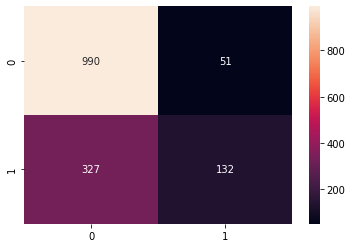

In [137]:
clf_rf = RandomForestClassifier(n_estimators=20 ,random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_valid,clf_rf.predict(X_valid))
print('Accuracy is: ',int(ac*100)," %")
cm = confusion_matrix(y_valid,clf_rf.predict(X_valid))
sns.heatmap(cm,annot=True,fmt="d")

# Feature selection

Feature ranking:
1. feature 12 (0.183847)
2. feature 9 (0.123003)
3. feature 5 (0.089536)
4. feature 11 (0.088539)
5. feature 4 (0.085646)
6. feature 0 (0.083445)
7. feature 10 (0.083338)
8. feature 3 (0.061349)
9. feature 7 (0.054809)
10. feature 1 (0.046166)
11. feature 30 (0.027876)
12. feature 6 (0.010709)
13. feature 18 (0.008571)
14. feature 8 (0.007738)
15. feature 15 (0.007523)
16. feature 13 (0.007323)
17. feature 24 (0.006650)
18. feature 14 (0.005269)
19. feature 20 (0.004913)
20. feature 2 (0.003270)
21. feature 22 (0.002576)
22. feature 16 (0.001972)
23. feature 26 (0.001394)
24. feature 21 (0.001125)
25. feature 17 (0.001001)
26. feature 27 (0.000811)
27. feature 28 (0.000580)
28. feature 29 (0.000487)
29. feature 23 (0.000229)
30. feature 25 (0.000204)
31. feature 19 (0.000102)


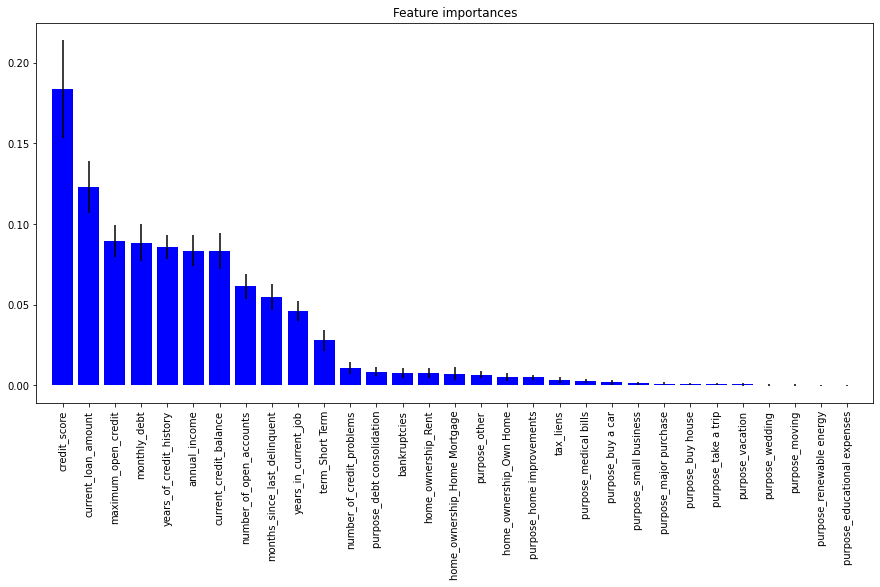

In [138]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(15, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Predicting on the test file

In [144]:
prediction = clf_rf.predict(test2)

C:\Users\Aorus\anaconda3\envs\Gpu_work\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
Feature names seen at fit time, yet now missing:
- purpose_renewable energy

  warnings.warn(message, FutureWarning)


In [145]:
prediction

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)